In [11]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category= FutureWarning)
import pandas_profiling

In [2]:
df=pd.read_csv('indian_liver_patient.csv')

# Exploratory Data analysis

In [3]:
df.shape

(583, 11)

In [4]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.dtypes

age                   int64
gender               object
tot_bilirubin       float64
direct_bilirubin    float64
tot_proteins          int64
albumin               int64
ag_ratio              int64
sgpt                float64
sgot                float64
alkphos             float64
is_patient            int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
print(df.is_patient.value_counts())

1    416
2    167
Name: is_patient, dtype: int64


## replacing the values

In [8]:
df['is_patient']=np.where((df.is_patient== int(1)),int(0), df.is_patient)
df['is_patient']= np.where((df.is_patient==int(2)),int(1),df.is_patient)

In [9]:
df['is_patient'].unique()

array([0, 1], dtype=int64)

Number of Zeros (0):  416
Number of Ones (1):  167


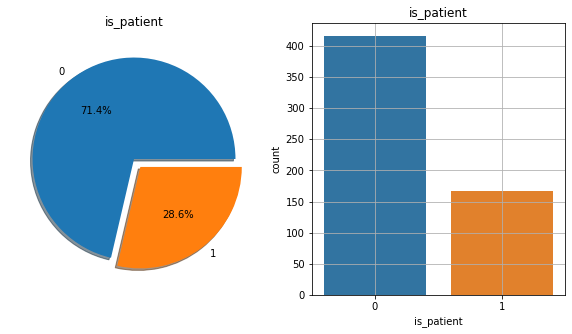

In [12]:
# visulaize the class labels of target variable(Dataset)
import seaborn as sns
import matplotlib.pyplot as plt
f,ax=plt.subplots(1,2,figsize=(10,5))
df['is_patient'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('is_patient')
ax[0].set_ylabel('')
sns.countplot('is_patient',data=df,ax=ax[1])
ax[1].set_title('is_patient')
Zeros, ones = df['is_patient'].value_counts()
print('Number of Zeros (0): ',Zeros)
print('Number of Ones (1): ',ones)
plt.grid()
plt.show()

# cleaning the dataset

## droping duplicates

In [13]:
df=df.drop_duplicates()

In [14]:
df.shape

(570, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               570 non-null    int64  
 1   gender            570 non-null    object 
 2   tot_bilirubin     570 non-null    float64
 3   direct_bilirubin  570 non-null    float64
 4   tot_proteins      570 non-null    int64  
 5   albumin           570 non-null    int64  
 6   ag_ratio          570 non-null    int64  
 7   sgpt              570 non-null    float64
 8   sgot              570 non-null    float64
 9   alkphos           566 non-null    float64
 10  is_patient        570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


## fill the null values with mean

In [16]:
mean_value=df['alkphos'].mean()
print(mean_value)
df['alkphos']= df['alkphos'].fillna(mean_value)


0.9480035335689051


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               570 non-null    int64  
 1   gender            570 non-null    object 
 2   tot_bilirubin     570 non-null    float64
 3   direct_bilirubin  570 non-null    float64
 4   tot_proteins      570 non-null    int64  
 5   albumin           570 non-null    int64  
 6   ag_ratio          570 non-null    int64  
 7   sgpt              570 non-null    float64
 8   sgot              570 non-null    float64
 9   alkphos           570 non-null    float64
 10  is_patient        570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


In [18]:
df.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.287719
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.318510,0.453097
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.948004,0.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


## changing categorical value into numerical value

In [19]:
dummy= pd.get_dummies(df['gender'])
dummy.head()
df=pd.concat([df,dummy], axis=1)
df=df.drop('gender', axis=1)

In [20]:
#create independent and dependent variable
target_name='is_patient'

y=df[target_name]

x=df.drop(target_name, axis=1)

In [21]:
x.head()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,Female,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


In [22]:
x.shape

(570, 11)

In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_patient, dtype: int64

In [24]:
y.shape

(570,)

## split the dataset

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#split into train/ test validation dataset
x_train, x_val, y_train, y_val= train_test_split(x, y, test_size=0.25, random_state=3)

In [27]:
x_train.shape, y_train.shape

((427, 11), (427,))

In [28]:
x_val.shape, y_val.shape

((143, 11), (143,))

In [29]:
x_train.dtypes, y_train.dtypes

(age                   int64
 tot_bilirubin       float64
 direct_bilirubin    float64
 tot_proteins          int64
 albumin               int64
 ag_ratio              int64
 sgpt                float64
 sgot                float64
 alkphos             float64
 Female                uint8
 Male                  uint8
 dtype: object,
 dtype('int64'))

## feature scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_val=sc.transform(x_val)

In [31]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.svm import SVC
svc_gr=SVC()
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svc_gr,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)


In [32]:
accuracy = grid_search.best_score_


In [33]:
accuracy

0.7237541528239203

In [34]:
grid_search.best_params_

{'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}

# Fit the algorithm

In [35]:
from sklearn.svm import SVC

In [36]:
svc=SVC(kernel = 'rbf', gamma=0.6)

In [37]:
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.6, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
# predict the target variable
svc_y_pred=svc.predict(x_val)

In [39]:
svc_train_score = round(svc.score(x_train, y_train) * 100, 2)
print('Random Forest Score on Train data: \n', svc_train_score)

Random Forest Score on Train data: 
 80.8


In [40]:
svc_Test_score = round(svc.score(x_val, y_val) * 100, 2)
print('Random Forest Score on test data: \n', svc_Test_score)

Random Forest Score on test data: 
 72.03


In [41]:
from sklearn.metrics import accuracy_score
svc_acc_score=round(accuracy_score(y_val,svc_y_pred)*100)
print('Accuracy: \n', svc_acc_score)

Accuracy: 
 72.0


In [42]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_val,svc_y_pred))

[[97  5]
 [35  6]]


## precision

In [43]:
from sklearn.metrics import precision_score
print("precision Score of macro is:", precision_score(y_val,svc_y_pred, average='macro')*100)
print("precision Score of micro is:", precision_score(y_val,svc_y_pred, average='micro')*100)
print("precision Score of weighted is:", precision_score(y_val,svc_y_pred, average='weighted')*100)

precision Score of macro is: 36.01398601398601
precision Score of micro is: 72.02797202797203
precision Score of weighted is: 51.88028754462321


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## recall

In [44]:
from sklearn.metrics import recall_score
print("recall_Score of macro is:",recall_score(y_val,svc_y_pred, average='macro')*100)
print("recall_Score of micro is:",recall_score(y_val,svc_y_pred, average='micro')*100)
print("recall_Score of weighted is:",recall_score(y_val,svc_y_pred, average='weighted')*100)

recall_Score of macro is: 50.0
recall_Score of micro is: 72.02797202797203
recall_Score of weighted is: 72.02797202797203


## f1-score

In [45]:
from sklearn.metrics import f1_score
print('f1_score of macro :',f1_score(y_val, svc_y_pred, average='macro')*100)
print('f1_score of micro :',f1_score(y_val, svc_y_pred, average='micro')*100)
print('f1_score of weighted :',f1_score(y_val, svc_y_pred, average='weighted')*100)

f1_score of macro : 41.86991869918699
f1_score of micro : 72.02797202797203
f1_score of weighted : 60.31610665757007


## Roc-curve

In [49]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
from sklearn.calibration import CalibratedClassifierCV

In [48]:
svm = SVC()

In [50]:
svc = CalibratedClassifierCV(svm)

In [52]:
svc.fit(x_train, y_train)

CalibratedClassifierCV(base_estimator=SVC(C=1.0, break_ties=False,
                                          cache_size=200, class_weight=None,
                                          coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='scale', kernel='rbf',
                                          max_iter=-1, probability=False,
                                          random_state=None, shrinking=True,
                                          tol=0.001, verbose=False),
                       cv=None, method='sigmoid')

In [54]:
svc.predict_proba(x_val)

array([[0.69535027, 0.30464973],
       [0.78597019, 0.21402981],
       [0.68282311, 0.31717689],
       [0.8055159 , 0.1944841 ],
       [0.72855844, 0.27144156],
       [0.70163128, 0.29836872],
       [0.76493671, 0.23506329],
       [0.70071924, 0.29928076],
       [0.74254409, 0.25745591],
       [0.7744932 , 0.2255068 ],
       [0.43772369, 0.56227631],
       [0.7077253 , 0.2922747 ],
       [0.753542  , 0.246458  ],
       [0.55988431, 0.44011569],
       [0.70473467, 0.29526533],
       [0.8078324 , 0.1921676 ],
       [0.6915414 , 0.3084586 ],
       [0.62697047, 0.37302953],
       [0.76258802, 0.23741198],
       [0.73780523, 0.26219477],
       [0.70809314, 0.29190686],
       [0.78229572, 0.21770428],
       [0.75303595, 0.24696405],
       [0.67810465, 0.32189535],
       [0.8142172 , 0.1857828 ],
       [0.4353386 , 0.5646614 ],
       [0.68394048, 0.31605952],
       [0.65205907, 0.34794093],
       [0.79623636, 0.20376364],
       [0.74796744, 0.25203256],
       [0.

In [56]:
svc_y_pred_prob = svc.predict_proba(x_val)[:,1]
FPR,TPR, thresholds = roc_curve(y_val, svc_y_pred_prob)

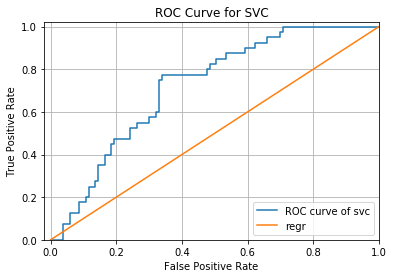

In [57]:
# create plot
plt.plot(FPR,TPR, label='ROC curve of svc')
plt.plot([0, 1], [0, 1],label='regr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.grid()
plt.show()